# Importing Packages & Setting Color Palette

In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import networkx as nx
from matplotlib.pyplot import figure


%matplotlib inline
sns.set(rc={'figure.figsize':(8,6)})
sns.set_style("darkgrid", {"axes.facecolor": ".93"})

palette = [ '#00BFC4' ,'#F8766D', '#0085C7', '#000000', "#FFCE54", '#A1469E']
sns.set_palette(palette)

# Loading & Viewing the Data

In [2]:
# Dataset: https://www.kaggle.com/CooperUnion/anime-recommendations-database


anime = pd.read_csv(r'C:\Users\Ferdous Hasan\Downloads\DATA DATA DATA (BA)\anime.csv')
rating = pd.read_csv(r'C:\Users\Ferdous Hasan\Downloads\DATA DATA DATA (BA)\rating.csv')

In [61]:
anime.head()

,anime_id,name,genre,type,episodes,rating,members,Number_Genres
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,4
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,7
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,7
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,2
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,7


In [4]:
print(anime.columns)

Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'], dtype='object')


In [5]:
print(rating.columns)

Index(['user_id', 'anime_id', 'rating'], dtype='object')


In [6]:
# 25th Percentile
def q25(x):
    return x.quantile(0.25)

# 75th Percentile
def q75(x):
    return x.quantile(0.75)

percetile_25 = q25(anime['rating'])
percetile_75 = q75(anime['rating'])
mean = anime['rating'].mean()
median = anime['rating'].median()

C:\Users\Ferdous Hasan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


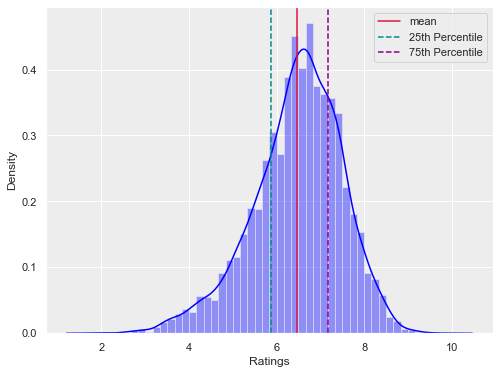

In [7]:
# make a side by side comparision of the rating of people

sns.distplot(anime.rating, color = 'blue').set(xlabel= 'Ratings')

plt.axvline(mean, 0,1, color = '#DC143C' , label = 'mean')
plt.axvline(percetile_25, 0,1, color = '#008B8B' , linestyle="--", label = '25th Percentile')
plt.axvline(percetile_75, 0,1, color = '#8B008B', linestyle="--", label = '75th Percentile')

plt.legend(loc='upper right')

plt.savefig('Rating_Variable', dpi = 300)

In [8]:
print(mean)
print(median)
print(percetile_25)
print(percetile_75)

6.473901690981445
6.57
5.88
7.18


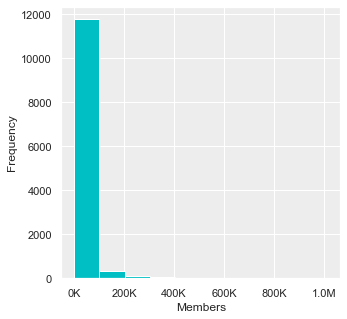

In [9]:
def format_number(data_value, indx):
    if data_value >= 1_000_000:
        formatter = '{:1.1f}M'.format(data_value*0.000_001)
    else:
        formatter = '{:1.0f}K'.format(data_value*0.001)
    return formatter 

fig, ax = plt.subplots(figsize = (5,5))
plt.hist(anime.members)
ax.xaxis.set_major_formatter(format_number)

plt.xlabel('Members')
plt.ylabel('Frequency')

plt.savefig('Member_Dist_Raw', dpi = 300)

In [10]:
percetile_25 = q25(anime['members'])
percetile_75 = q75(anime['members'])
mean = anime['members'].mean()
median = anime['members'].median()

print(mean)
print(median)
print(percetile_25)
print(percetile_75)

18071.33886448674
1550.0
225.0
9437.0


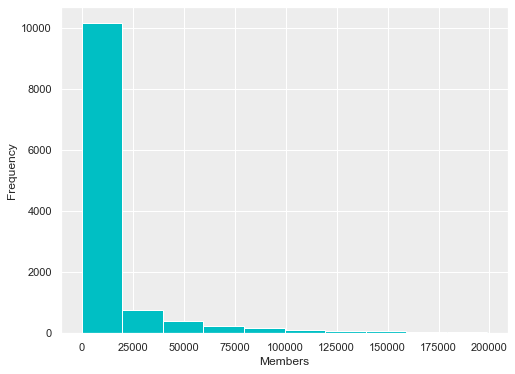

In [11]:
most_anime = anime.loc[anime['members'] <= 200000]

plt.hist(most_anime.members)
plt.xlabel('Members')
plt.ylabel('Frequency')

plt.savefig('Member_Dist_Focused', dpi = 300)

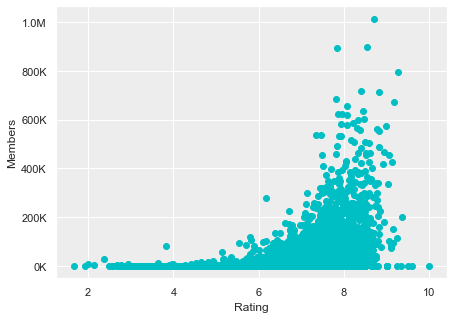

In [12]:
fig, ax = plt.subplots(figsize = (7,5))

plt.scatter(anime.rating, anime.members)
ax.yaxis.set_major_formatter(format_number)
plt.xlabel('Rating')
plt.ylabel('Members')


plt.savefig('Rating_vs_Members', dpi = 300)

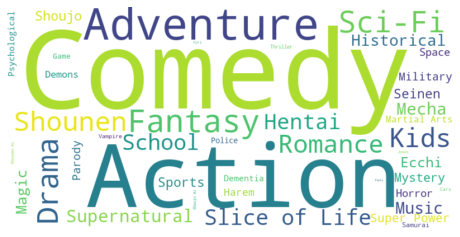

In [13]:
anime_2 = anime.copy()
anime_2.dropna(inplace=True)

from collections import defaultdict
all_genres = defaultdict(int)

for genres in anime_2['genre']:
    for genre in genres.split(','):
        all_genres[genre.strip()] += 1

from wordcloud import WordCloud

genres_cloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(all_genres)
plt.imshow(genres_cloud, interpolation='bilinear')
plt.axis('off')

plt.savefig('Genre_Word_Cloud', dpi = 300)

In [14]:
def count_genres(df):
    amount_of_genres = []
    df['genre'] = df['genre'].astype(str)
    for genre in df['genre']:
        if genre != 'NaN':
            count = len(genre.split(','))
            amount_of_genres.append(count)
        else:
            amount_of_genres.append(-1)
    return amount_of_genres

anime['Number_Genres'] = count_genres(anime)

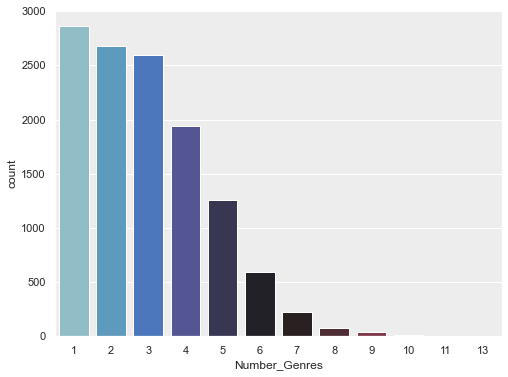

In [15]:
sns.countplot(x="Number_Genres", data=anime, palette="icefire")
plt.savefig('Number_Genres', dpi = 300)

In [47]:
anime.Number_Genres.value_counts()

1     2866
2     2677
3     2599
4     1940
5     1261
6      595
7      228
8       73
9       40
10      12
11       2
13       1
Name: Number_Genres, dtype: int64

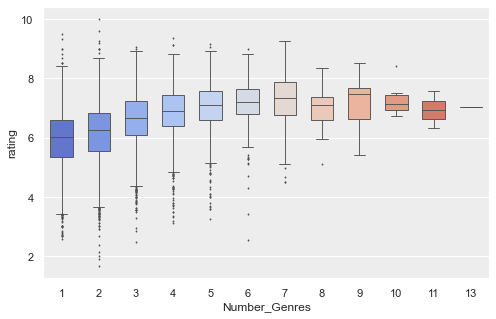

In [16]:
fig, ax = plt.subplots(figsize = (8,5))
ax = sns.boxplot(x="Number_Genres", y="rating", data=anime, palette = 'coolwarm', width=0.6, fliersize=1, linewidth=0.9)

plt.savefig('Number_Genres_Rating', dpi = 300)

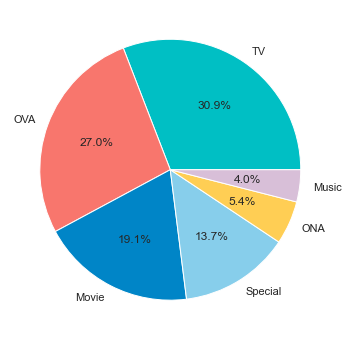

In [20]:
type_release = anime.type.value_counts()
palette = [ '#00BFC4' ,'#F8766D', '#0085C7', 'skyblue', "#FFCE54", 'thistle']
sns.set_palette(palette)
plt.pie(type_release, autopct='%.1f%%', labels = type_release.index)

plt.savefig('Number_Genres_Rating', dpi = 300)

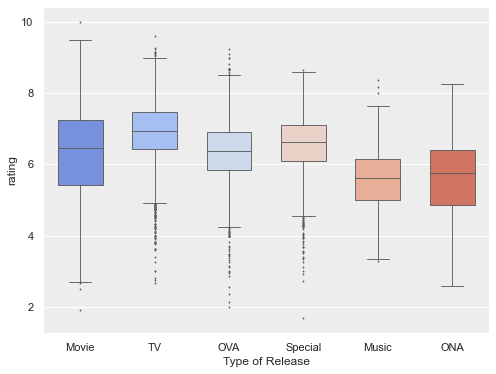

In [21]:
sns.boxplot(data=anime, x='type', y='rating',  palette = 'coolwarm', width=0.6, fliersize=1, linewidth=0.9)
plt.xlabel('Type of Release')
plt.savefig('Release_rating', dpi = 300)

<ipython-input-41-812b287c1214>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  know_episodes['episodes'] = know_episodes['episodes'].astype(int)


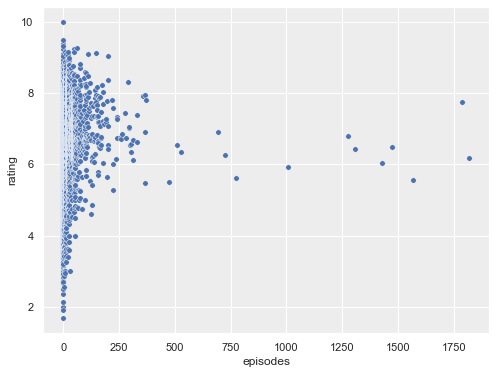

In [41]:
sns.set(font_scale=1)
sns.set(rc={'figure.figsize':(8,6)})
sns.set_style("darkgrid", {"axes.facecolor": ".93"})

know_episodes = anime[anime['episodes']!='Unknown']
know_episodes['episodes'] = know_episodes['episodes'].astype(int)

sns.scatterplot(x="episodes", y="rating",data=know_episodes.sort_values('episodes'), s=30)

plt.savefig('Episode_VS_Rating', dpi = 300)

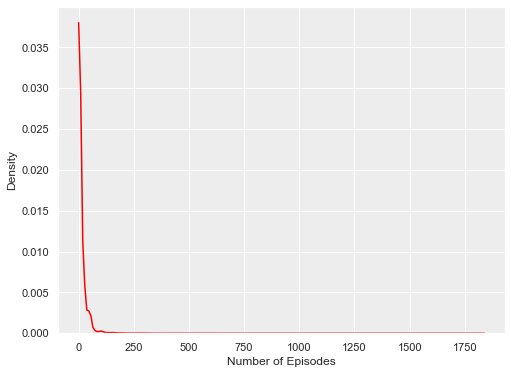

In [46]:
sns.kdeplot(x="episodes", data=know_episodes.sort_values('episodes'), color = 'red', clip=(0.0, 2000))

plt.xlabel('Number of Episodes')

plt.savefig('Episode_Distribution', dpi = 300)

In [62]:
know_episodes.sort_values('episodes').episodes.max()

1818

In [54]:
know_episodes.sort_values('episodes').episodes.mean()

12.382549774134182

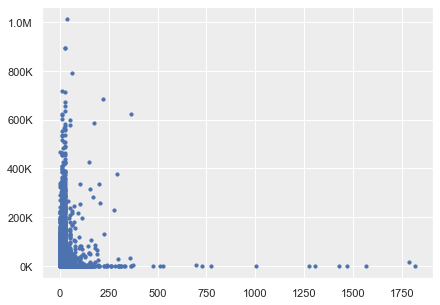

In [67]:
fig, ax = plt.subplots(figsize = (7,5))
plt.scatter(x="episodes", y="members",data=know_episodes.sort_values('episodes'), s=10)
ax.yaxis.set_major_formatter(format_number)

In [70]:
dummies = pd.get_dummies(anime['genre'].str.get_dummies(sep=','))

In [76]:
matrix = np.asmatrix(dummies.corr())
G = nx.from_numpy_matrix(matrix)

In [85]:
def create_corr_network(G, corr_direction, min_correlation):
    H = G.copy()
    for stock1, stock2, weight in G.edges(data=True):
        if corr_direction == "positive":
            if weight["weight"] <0 or weight["weight"] < min_correlation:
                H.remove_edge(stock1, stock2)
        else:
            if weight["weight"] >=0 or weight["weight"] > min_correlation:
                H.remove_edge(stock1, stock2)
                
    edges,weights = zip(*nx.get_edge_attributes(H,'weight').items())
    weights = tuple([(1+abs(x))**2 for x in weights])
    d = nx.degree(H)
    nodelist, node_sizes = zip(*d)
    positions=nx.circular_layout(H)
    
    plt.figure(figsize=(10,10), dpi=72)

    nx.draw_networkx_nodes(H,positions,node_color='#DA70D6',nodelist=nodelist,
                           node_size=tuple([x**2 for x in node_sizes]),alpha=0.8)
    
    nx.draw_networkx_labels(H, positions, font_size=8, 
                            font_family='sans-serif')
    
    if corr_direction == "positive": edge_colour = plt.cm.GnBu 
    else: edge_colour = plt.cm.PuRd
        
    nx.draw_networkx_edges(H, positions, edge_list=edges,style='solid',
                          width=weights, edge_color = weights, edge_cmap = edge_colour,
                          edge_vmin = min(weights), edge_vmax=max(weights))
    plt.axis('off')

TypeError: draw_networkx_edges() got an unexpected keyword argument 'edge_list'

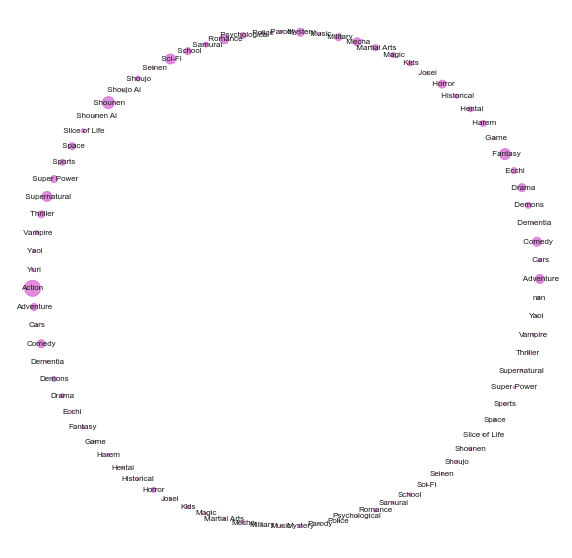

In [81]:
sns.set_style("darkgrid", {"axes.facecolor": "1"})

corr = dummies.corr() 
stocks = corr.index.values 
csr_matrix = np.asmatrix(corr) 
G = nx.from_numpy_matrix(cor_matrix) 
G = nx.relabel_nodes(G,lambda x: stocks[x]) 
G.edges(data=True) 
create_corr_network(G, 'positive', 0.1)

# Merging Dataset

In [68]:
rating.rating.unique()

array([-1, 10,  8,  6,  9,  7,  3,  5,  4,  1,  2], dtype=int64)

In [69]:
rating['rating'].value_counts()

 8     1646019
-1     1476496
 7     1375287
 9     1254096
 10     955715
 6      637775
 5      282806
 4      104291
 3       41453
 2       23150
 1       16649
Name: rating, dtype: int64

In [ ]:
df = pd.merge(anime,rating,on='anime_id',suffixes= ['', '_user'])
df = df.rename(columns={'name': 'anime_title', 'rating_user': 'user_rating'})
df.tail()

In [ ]:
df.shape[0]

# Exploratory Analysis

# ML